In [1]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

### Задание 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

In [2]:
def proba(scale):
    return stats.norm.cdf(x, loc, scale)

In [3]:
loc = 1.06
x = 1
proba_ = 0.05

In [4]:
scale_min, scale_max, scale = 0, 10, 10

In [5]:
while round(proba(scale), 10) != proba_:
    scale = (scale_min + scale_max) / 2
    
    if proba(scale) > proba_:
        scale_max = scale
    else:
        scale_min = scale

In [6]:
scale, proba(scale)

(0.03647740992164472, 0.050000000032268635)

In [7]:
print('Среднее квадратическое отклонение массы коробки =', scale)

Среднее квадратическое отклонение массы коробки = 0.03647740992164472


In [8]:
print(f'Процент коробок, имеющих массу больше 1.1 кг = {(1 - stats.norm.cdf(1.1, loc, scale)) * 100:.2f}%')

Процент коробок, имеющих массу больше 1.1 кг = 13.64%


### Задание 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

In [9]:
a = 12
b = 14
n = 30

In [10]:
M = (a + b) / 2
D = pow(b - a, 2) / 12

In [11]:
loc = n * M
scale = pow(n * D, 0.5)

loc, scale

(390.0, 3.1622776601683795)

In [12]:
print(f'Вероятность, что масса всей коробки будет меньше 390 граммов = {stats.norm.cdf(390, loc, scale) * 100:.2f}%')

Вероятность, что масса всей коробки будет меньше 390 граммов = 50.00%


In [13]:
print(f'Вероятность, что масса всей коробки будет больше 395 граммов = {(1 - stats.norm.cdf(395, loc, scale)) * 100:.2f}%')

Вероятность, что масса всей коробки будет больше 395 граммов = 5.69%


In [14]:
print(f'Вероятность, что масса всей коробки будет составлять от 380 до 400 граммов = \
{(stats.norm.cdf(400, loc, scale) - stats.norm.cdf(380, loc, scale)) * 100:.2f}%')

Вероятность, что масса всей коробки будет составлять от 380 до 400 граммов = 99.84%


### Задание 3

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения,  D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

В качестве примера возьмем распределения Пуассона: $P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$, для него $M(X) = D(X) = \lambda$

In [15]:
def samples(n):
    
    sample_means = [stats.poisson.rvs(mu=mu, size=n).mean() for _ in range(1000)]
    
    loc = mu
    scale = pow(mu / n, 0.5)
    
    ox = np.linspace(3, 18, 1000)

    plt.hist(sample_means, density=True, bins=15, alpha=0.65)
    plt.plot(ox, stats.norm.pdf(ox, loc, scale))
    plt.show()

In [16]:
mu = 10
n = [2, 5, 10, 25]

При n = 2:


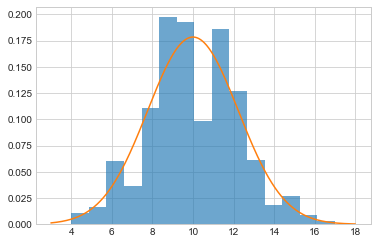

При n = 5:


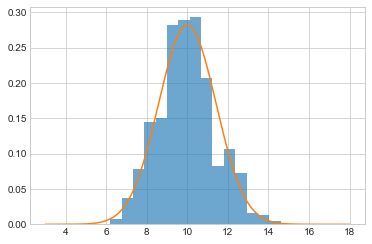

При n = 10:


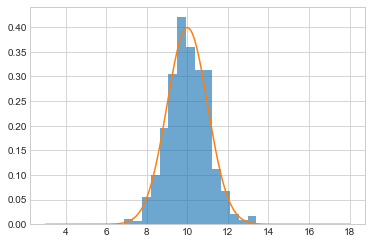

При n = 25:


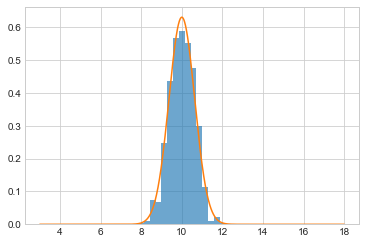

In [17]:
for i in n:
    print(f'При n = {i}:')
    samples(i)